<a href="https://colab.research.google.com/github/DanB1421/DATA602/blob/main/Brilliant_Problem_Set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2

## Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

### Import data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1

Using the `weather` dataset, construct a derived data frame having the following qualities:

1. Each row represents an observation day
2. Each column represents an hourly temperature observation.  That is, the dataframe includes 24 columns of the form `tmpmeasx`	where x ranges from 0 to 23 and represents the observation taken that hour.  (For changes from daylight savings time to standard time, there are two observations at the 1:00 hour (local).  You may discard one of the values arbitrarily.)

In [ ]:
from datetime import date, time # imports date and time functions from datetime
wdf.head() # displays the first 5 entries of wdf

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0


In [ ]:
wdf['Date'] = pd.to_datetime(wdf['date']).dt.date # converts the datetime from the 'date' column into a column of just date entries
wdf['Time'] = pd.to_datetime(wdf['date']).dt.hour # converts the datetime from the 'date' column into a column of just the hour in which the data was observed
wdf.head() # displays the first 5 entries of the new data table

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,Date,Time
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,2015-12-31,19
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,2015-12-31,20
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,2015-12-31,21
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,2015-12-31,22
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,2015-12-31,23


In [ ]:
wdf.loc[(wdf['Time'] == 1) & (wdf['date'].dt.month == 11) & (wdf['date'].dt.day <= 7)] # finds all entries that occurred at hour 1 between November 1 and November 7 in order to find repeated entries due to daylight savings to standard time change

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,Date,Time
7323,2016-11-01 01:54:00-04:00,0.0,3.9,0.0,0,2.0,0,0,0,0,2016-11-01,1
7347,2016-11-02 01:54:00-04:00,0.0,10.6,0.0,0,3.0,0,0,0,0,2016-11-02,1
7371,2016-11-03 01:54:00-04:00,0.0,12.2,0.0,0,3.0,0,0,0,0,2016-11-03,1
7395,2016-11-04 01:54:00-04:00,1.5,15.6,0.0,0,3.0,0,0,0,0,2016-11-04,1
7419,2016-11-05 01:54:00-04:00,2.1,6.1,0.0,0,0.0,0,0,0,0,2016-11-05,1
7443,2016-11-06 01:54:00-04:00,3.1,9.4,0.0,0,0.0,0,0,0,0,2016-11-06,1
7444,2016-11-06 01:54:00-05:00,4.6,10.6,0.0,0,1.0,0,0,0,0,2016-11-06,1
7468,2016-11-07 01:54:00-05:00,1.5,7.8,0.0,0,0.0,0,0,0,0,2016-11-07,1
16082,2017-11-01 01:54:00-04:00,3.1,6.7,0.0,0,3.0,0,0,0,0,2017-11-01,1
16106,2017-11-02 01:54:00-04:00,0.0,10.6,0.0,0,3.0,0,0,0,0,2017-11-02,1


In [ ]:
wdf_derived = wdf[['Date', 'Time', 'tmp_meas']] # creates a derived data table with the columns of interest
wdf_derived.drop([7444, 16179, 24908, 33641, 42374, 51277], axis=0, inplace=True) # drops the second hour 1 rows for each day where daylight savings to standard time changes occurred
wdf_derived.head() # displays the first 5 entries of the derived table

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Time,tmp_meas
0,2015-12-31,19,7.2
1,2015-12-31,20,6.1
2,2015-12-31,21,6.7
3,2015-12-31,22,6.1
4,2015-12-31,23,5.6


In [ ]:
wdf_derived_pivot = wdf_derived.groupby([wdf_derived['Date'], wdf_derived['Time']]).mean().unstack() # creates a multi-index grouping of the derived table by date and time by mean (since no entries are repeated the values do not change), then unstacks to make the Time values the columns
wdf_derived_pivot.head() # displays the first 5 entries of the derived pivot table

tmp_meas                                               ...        \
Time             0    1    2    3    4    5    6    7    8    9   ...    14   
Date                                                              ...         
2015-12-31      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   
2016-01-01      5.0  4.4  3.9  3.3  3.3  4.4  3.9  3.9  4.4  5.6  ...   5.6   
2016-01-02     -0.6 -1.7 -1.7 -0.6 -2.8 -2.2 -2.8 -2.2  1.1  3.3  ...   8.3   
2016-01-03     -1.7 -1.7 -2.2 -2.8 -2.8 -0.6 -1.1 -2.8  1.7  5.6  ...  11.1   
2016-01-04     -2.2 -1.7 -2.8 -1.7  0.0  0.0  0.6  0.6  0.6  0.0  ...   1.1   

                                                          
Time          15   16   17   18   19   20   21   22   23  
Date                                                      
2015-12-31   NaN  NaN  NaN  NaN  7.2  6.1  6.7  6.1  5.6  
2016-01-01   5.0  4.4  3.9  2.2  1.1  0.6 -0.6  0.6  0.6  
2016-01-02   7.8  6.1  3.9  2.2  1.7  0.6  0.0 -1.1 -1.7  
2016-01-03  10.6  8.9  5.6  3.9  2.8  1.7  0.6  0.0 -1.1  
2016-01-04   0.0 -1.7 -2.2 -2.8 -3.3 -5.0 -6.1 -7.2 -8.3  

[5 rows x 24 columns]

Using this derived dataset, show the average difference in temperature, standard deviation, and max/min values between observations taken in hours 2 (about 2:56am) and 14 (about 14:56, or 2:56pm).

In [ ]:
mean_diff = wdf_derived_pivot[('tmp_meas', 14)].mean() - wdf_derived_pivot[('tmp_meas', 2)].mean() # finds the difference in means between hours 2 and 14
std_diff = wdf_derived_pivot[('tmp_meas', 14)].std() - wdf_derived_pivot[('tmp_meas', 2)].std() # finds the difference in standard deviations between hours 2 and 14
max_diff = wdf_derived_pivot[('tmp_meas', 14)].max() - wdf_derived_pivot[('tmp_meas', 2)].max() # finds the difference in maxima between hours 2 and 14
min_diff = wdf_derived_pivot[('tmp_meas', 14)].min() - wdf_derived_pivot[('tmp_meas', 2)].min() # finds the difference in minima between hours 2 and 14

print(mean_diff) # prints mean_diff
print(std_diff) # prints std_diff
print(max_diff) # prints max_diff
print(min_diff) # prints min_diff

7.106355618373122
0.9709032518195073
7.800000000000004
5.6


## Question 2

**Circular data and One-Hot Encoding** Using the `Citations` data frame (`cdf`), discard records where the violation timestamp is not between January 1, 2021 and July 1, 2022.

In [ ]:
cdf.head() # displays first 5 entries of cdf

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,91,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00
1,166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,<NA>,2011-12-09 12:39:00
2,299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00
3,315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,<NA>,2011-12-09 12:01:59
4,562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00


In [ ]:
cdf_mod = cdf[cdf["violdate"].between('2021-01-01', '2022-07-01')].reset_index(drop=True) # derives data frame with only values that occurred between January 1, 2021 and July 1, 2022 and resets the index
cdf_mod.head() # displays first 5 entries of derived data frame

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,1713171,N73LDS,NJ,12,No Stopping/Standing Not Tow-Away Zone,32,2021-01-31 18:40:00-05:00,<NA>,2021-01-31 18:40:00
1,1713189,9ET0286,MD,99,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00-05:00,<NA>,2021-12-29 17:00:00
2,1713197,9EP2809,MD,99,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00-05:00,<NA>,2021-12-29 17:00:00
3,3481843,3EJ7926,MD,99,All Other Stopping or Parking Violations,32,2021-08-27 18:45:00-04:00,<NA>,2021-08-27 18:45:00
4,130278,19213CD,MD,27,No Stop/Park Street Cleaning,52,2021-06-06 23:40:00-04:00,"(39.28997272, -76.61002178)",2021-06-06 23:40:00


Identify the 5 most common violation types.  Remove from the derivative data frame any observation where the violation type is not among these 5 most common

In [ ]:
cdf_mod_viol_count = cdf_mod["violcode"].value_counts() # counts the number of occurrences for each violation code
cdf_mod_viol_count # displays the number of occurrences for each violation code

32    688281
30    242962
31    151114
18    128506
22     86318
12     61862
8      47556
11     39017
99     20708
46     10592
5       9306
17      7121
20      7052
1       4169
15      3694
3       3327
26      2606
19      2424
10      1586
43       553
16       495
6        433
13       430
41       282
9        267
23       126
47       107
42        81
27        55
45        25
2         25
50        18
28        16
4         10
44         8
51         7
25         4
40         2
7          2
52         1
14         1
Name: violcode, dtype: int64

In [ ]:
topviol = cdf_mod.loc[((cdf_mod["violcode"] == 32) | (cdf_mod["violcode"] == 30) | (cdf_mod["violcode"] == 31) | (cdf_mod["violcode"] == 18) | (cdf_mod["violcode"] == 22))].reset_index(drop=True) # derives a data table with only the 5 most common violation codes from cdf_mod and resets the index
topviol.head() # displays the first 5 entries in the derived dataframe

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,998922,B26506,VA,22,Expired Tags,32,2021-02-17 09:13:00-05:00,"(39.29069591, -76.61812865)",2021-02-17 09:13:00
1,998930,72176CJ,MD,22,Expired Tags,32,2021-02-16 08:39:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 08:39:00
2,998948,4EG5744,MD,22,Expired Tags,32,2021-02-16 20:41:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 20:41:00
3,998955,8DN6216,MD,22,Expired Tags,32,2021-02-16 08:48:00-05:00,<NA>,2021-02-16 08:48:00
4,998963,S0363681,GA,22,Expired Tags,32,2021-02-16 09:01:00-05:00,"(39.29192061, -76.62030785)",2021-02-16 09:01:00


Identify the average time of day for each violation in the derivative data frame.  (You will need to use the circular mean to compute this average.  Hint: begin by transforming the time of day to an angle on the unit circle, where $0=2\pi$ radians indicates midnight, and $\pi$ radians represents noon.)

Note: the following functions may be useful for this question:

In [ ]:
import numpy as np


@np.vectorize
def timetotheta(hr: int, min: int) -> float:
  """ Convert a time of day (hour, minute) to an angle on the unit circle
    (e.g., (12,0) -> pi)
  """
  ratio = (hr * 60 + min) / (23*60+60)
  return ratio * 2 * np.pi

@np.vectorize
def thetatotime(theta: float) -> (int, int):
  """ Convert a an angle on the unit circle to a time
    (e.g., pi -> "12:00")
  """
  theta = theta + (2 * np.pi) if theta < 0 else theta
  elapsedmin = np.round(theta/(2 * np.pi) * 24 * 60)
  hr, min = np.divmod(elapsedmin, 60)
  return f"{int(hr):02d}:{int(min):02d}"

In [ ]:
topviol32 = topviol.loc[topviol['violcode'] == 32].reset_index() # creates new dataframe with only Fixed Speed Camera violation data
topviol32['violtime'] = topviol32['violdtl'].dt.strftime('%H:%M') # creates column in topviol32 with the time extracted from the datetime
topviol32['hour'] = topviol32['violtime'].str.extract('([0-9]{2})').astype(int) # creates column in topviol32 with the hour extracted from the time\
topviol32['minute'] = topviol32['violtime'].str.extract('(?<=:)([0-9]{2})').astype(int) # creates column in topviol32 with the minute extracted from the time
topviol32['theta'] = topviol32.apply(lambda x: timetotheta(x.hour, x.minute), axis=1) # applies timetotheta to the hour and minute columns to create a column of their corresponding unit circle angles
topviol32.head() # displays first 5 entries of topviol32

,index,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,violtime,hour,minute,theta
0,209666,36949957,4EG7666,MD,32,Fixed Speed Camera,40,2021-01-01 06:01:00-05:00,<NA>,2021-01-01 06:01:00,06:01,6,1,1.5751596499248823
1,209667,36949965,2DS3110,MD,32,Fixed Speed Camera,40,2021-01-01 06:03:00-05:00,<NA>,2021-01-01 06:03:00,06:03,6,3,1.5838862961848539
2,209668,36949973,3DN1886,MD,32,Fixed Speed Camera,40,2021-01-01 06:04:59-05:00,<NA>,2021-01-01 06:04:59,06:04,6,4,1.5882496193148399
3,209669,36949981,GI3131,DC,32,Fixed Speed Camera,40,2021-01-01 06:07:00-05:00,<NA>,2021-01-01 06:07:00,06:07,6,7,1.6013395887047972
4,209670,36949999,8EF6787,MD,32,Fixed Speed Camera,40,2021-01-01 06:07:00-05:00,<NA>,2021-01-01 06:07:00,06:07,6,7,1.6013395887047972


In [ ]:
topviol32_theta = [i.item() for i in topviol32['theta']] # converts theta column from a series of np.arrays to a list of floating point numbers
topviol32_sin = [np.sin(i) for i in topviol32_theta] # creates a list of the sine values for topviol32_theta
topviol32_cos = [np.cos(i) for i in topviol32_theta] # creates a list of the cosine values for topviol32_theta
topviol32_circularmean = np.arctan2(np.mean(topviol32_sin), np.mean(topviol32_cos)) # computes the circular mean of the time unit circle angles for topviol32
topviol32_mean = thetatotime(topviol32_circularmean) # converts the circular mean to a time value
print("The mean time of occurrence for Fixed Speed Camera violations is:", topviol32_mean) # prints the mean time of Fixed Speed Camera violations

The mean time of occurrence for Fixed Speed Camera violations is: 13:22


In [ ]:
topviol30 = topviol.loc[topviol['violcode'] == 30].reset_index() # creates new dataframe with only Red Light Violation data
topviol30['violtime'] = topviol30['violdtl'].dt.strftime('%H:%M') # creates column in topviol30 with the time extracted from the datetime
topviol30['hour'] = topviol30['violtime'].str.extract('([0-9]{2})').astype(int) # creates column in topviol30 with the hour extracted from the time
topviol30['minute'] = topviol30['violtime'].str.extract('(?<=:)([0-9]{2})').astype(int) # creates column in topviol30 with the minute extracted from the time
topviol30['theta'] = topviol30.apply(lambda x: timetotheta(x.hour, x.minute), axis=1) # applies timetotheta to the hour and minute columns to create a column of their corresponding unit circle angles
topviol30.head() # displays first 5 entries of topviol30

,index,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,violtime,hour,minute,theta
0,441146,57805476,5DL9210,MD,30,Red Light Violation,75,2021-03-08 11:48:00-05:00,<NA>,2021-03-08 11:48:00,11:48,11,48,3.089232776029963
1,441147,57805484,08775CK,MD,30,Red Light Violation,75,2021-03-08 11:45:00-05:00,<NA>,2021-03-08 11:45:00,11:45,11,45,3.076142806640006
2,441148,57805492,1EK4231,MD,30,Red Light Violation,75,2021-03-08 07:56:00-05:00,<NA>,2021-03-08 07:56:00,07:56,7,56,2.076941809873252
3,441149,57805500,5EF6231,MD,30,Red Light Violation,75,2021-03-07 17:53:00-05:00,<NA>,2021-03-07 17:53:00,17:53,17,53,4.681845718474789
4,441151,57805526,LG86801,MD,30,Red Light Violation,75,2021-03-08 09:42:00-05:00,<NA>,2021-03-08 09:42:00,09:42,9,42,2.5394540616517496


In [ ]:
topviol30_theta = [i.item() for i in topviol30['theta']] # converts theta column from a series of np.arrays to a list of floating point numbers
topviol30_sin = [np.sin(i) for i in topviol30_theta] # creates a list of the sine values for topviol30_theta
topviol30_cos = [np.cos(i) for i in topviol30_theta] # creates a list of the cosine values for topviol30_theta
topviol30_circularmean = np.arctan2(np.mean(topviol30_sin), np.mean(topviol30_cos)) # computes the circular mean of the time unit circle angles for topviol30
topviol30_mean = thetatotime(topviol30_circularmean) # converts the circular mean to a time value
print("The mean time of occurrence for Red Light Violations is:", topviol30_mean) # prints the mean time of Red Light Violations

The mean time of occurrence for Red Light Violations is: 14:23


In [ ]:
topviol31 = topviol.loc[topviol['violcode'] == 31].reset_index() # creates new dataframe with only Right on Red violation data
topviol31['violtime'] = topviol31['violdtl'].dt.strftime('%H:%M') # creates column in topviol31 with the time extracted from the datetime
topviol31['hour'] = topviol31['violtime'].str.extract('([0-9]{2})').astype(int) # creates column in topviol31 with the hour extracted from the time
topviol31['minute'] = topviol31['violtime'].str.extract('(?<=:)([0-9]{2})').astype(int) # creates column in topviol31 with the minute extracted from the time
topviol31['theta'] = topviol31.apply(lambda x: timetotheta(x.hour, x.minute), axis=1) # applies timetotheta to the hour and minute columns to create a column of their corresponding unit circle angles
topviol31.head() # displays first 5 entries of topviol31

,index,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,violtime,hour,minute,theta
0,441144,57805450,FBN8569,NC,31,Right on Red,75,2021-03-08 10:25:00-05:00,<NA>,2021-03-08 10:25:00,10:25,10,25,2.72707695624114
1,441145,57805468,6EB1355,MD,31,Right on Red,75,2021-03-08 11:48:00-05:00,<NA>,2021-03-08 11:48:00,11:48,11,48,3.089232776029963
2,441150,57805518,7DE3217,MD,31,Right on Red,75,2021-03-08 09:22:00-05:00,<NA>,2021-03-08 09:22:00,09:22,9,22,2.4521875990520328
3,441153,57805542,1EH8147,MD,31,Right on Red,75,2021-03-08 11:38:00-05:00,<NA>,2021-03-08 11:38:00,11:38,11,38,3.045599544730105
4,441155,57805567,PET1402,MD,31,Right on Red,75,2021-03-08 11:32:59-05:00,<NA>,2021-03-08 11:32:59,11:32,11,32,3.01941960595019


In [ ]:
topviol31_theta = [i.item() for i in topviol31['theta']] # converts theta column from a series of np.arrays to a list of floating point numbers
topviol31_sin = [np.sin(i) for i in topviol31_theta] # creates a list of the sine values for topviol31_theta
topviol31_cos = [np.cos(i) for i in topviol31_theta] # creates a list of the cosine values for topviol31_theta
topviol31_circularmean = np.arctan2(np.mean(topviol31_sin), np.mean(topviol31_cos)) # computes the circular mean of the time unit circle angles for topviol31
topviol31_mean = thetatotime(topviol31_circularmean) # converts the circular mean to a time value
print("The mean time of occurrence for Right on Red violations is:", topviol31_mean) # prints the mean time of Right on Red violations

The mean time of occurrence for Right on Red violations is: 13:48


In [ ]:
topviol18 = topviol.loc[topviol['violcode'] == 18].reset_index() # creates new dataframe with only All Other Parking Meter Violation data
topviol18['violtime'] = topviol18['violdtl'].dt.strftime('%H:%M') # creates column in topviol18 with the time extracted from the datetime
topviol18['hour'] = topviol18['violtime'].str.extract('([0-9]{2})').astype(int) # creates column in topviol18 with the hour extracted from the time
topviol18['minute'] = topviol18['violtime'].str.extract('(?<=:)([0-9]{2})').astype(int) # creates column in topviol18 with the minute extracted from the time
topviol18['theta'] = topviol18.apply(lambda x: timetotheta(x.hour, x.minute), axis=1) # applies timetotheta to the hour and minute columns to create a column of their corresponding unit circle angles
topviol18.head() # displays first 5 entries of topviol18

,index,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,violtime,hour,minute,theta
0,10,2816122,3EC2015,MD,18,All Other Parking Meter Violations,32,2021-08-11 11:51:00-04:00,"(39.28741433, -76.59402995)",2021-08-11 11:51:00,11:51,11,51,3.102322745419921
1,11,2816130,G14743,VA,18,All Other Parking Meter Violations,32,2021-05-05 08:16:59-04:00,<NA>,2021-05-05 08:16:59,08:16,8,16,2.1642082724729685
2,21,4534252,5AV0915,MD,18,All Other Parking Meter Violations,32,2021-01-07 11:38:00-05:00,<NA>,2021-01-07 11:38:00,11:38,11,38,3.045599544730105
3,63,6295092,0285891,MD,18,All Other Parking Meter Violations,32,2021-03-11 17:13:00-05:00,<NA>,2021-03-11 17:13:00,17:13,17,13,4.507312793275356
4,71,5895421,9DJ1527,MD,18,All Other Parking Meter Violations,32,2021-05-25 12:00:00-04:00,<NA>,2021-05-25 12:00:00,12:00,12,0,3.141592653589793


In [ ]:
topviol18_theta = [i.item() for i in topviol18['theta']] # converts theta column from a series of np.arrays to a list of floating point numbers
topviol18_sin = [np.sin(i) for i in topviol18_theta] # creates a list of the sine values for topviol18_theta
topviol18_cos = [np.cos(i) for i in topviol18_theta] # creates a list of the cosine values for topviol18_theta
topviol18_circularmean = np.arctan2(np.mean(topviol18_sin), np.mean(topviol18_cos)) # computes the circular mean of the time unit circle angles for topviol18
topviol18_mean = thetatotime(topviol18_circularmean) # converts the circular mean to a time value
print("The mean time of occurrence for All Other Parking Meter Violations is:", topviol18_mean) # prints the mean time of All Other Parking Meter Violations

The mean time of occurrence for All Other Parking Meter Violations is: 12:57


In [ ]:
topviol22 = topviol.loc[topviol['violcode'] == 22].reset_index() # creates new dataframe with only Expired Tags violation data
topviol22['violtime'] = topviol22['violdtl'].dt.strftime('%H:%M') # creates column in topviol22 with the time extracted from the datetime
topviol22['hour'] = topviol22['violtime'].str.extract('([0-9]{2})').astype(int) # creates column in topviol22 with the hour extracted from the time
topviol22['minute'] = topviol22['violtime'].str.extract('(?<=:)([0-9]{2})').astype(int) # creates column in topviol22 with the minute extracted from the time
topviol22['theta'] = topviol22.apply(lambda x: timetotheta(x.hour, x.minute), axis=1) # applies timetotheta to the hour and minute columns to create a column of their corresponding unit circle angles
topviol22.head() # displays first 5 entries of topviol22

,index,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,violtime,hour,minute,theta
0,0,998922,B26506,VA,22,Expired Tags,32,2021-02-17 09:13:00-05:00,"(39.29069591, -76.61812865)",2021-02-17 09:13:00,09:13,9,13,2.4129176908821606
1,1,998930,72176CJ,MD,22,Expired Tags,32,2021-02-16 08:39:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 08:39:00,08:39,8,39,2.2645647044626425
2,2,998948,4EG5744,MD,22,Expired Tags,32,2021-02-16 20:41:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 20:41:00,20:41,20,41,5.414884004312408
3,3,998955,8DN6216,MD,22,Expired Tags,32,2021-02-16 08:48:00-05:00,<NA>,2021-02-16 08:48:00,08:48,8,48,2.3038346126325147
4,4,998963,S0363681,GA,22,Expired Tags,32,2021-02-16 09:01:00-05:00,"(39.29192061, -76.62030785)",2021-02-16 09:01:00,09:01,9,1,2.360557813322331


In [ ]:
topviol22_theta = [i.item() for i in topviol22['theta']] # converts theta column from a series of np.arrays to a list of floating point numbers
topviol22_sin = [np.sin(i) for i in topviol22_theta] # creates a list of the sine values for topviol22_theta
topviol22_cos = [np.cos(i) for i in topviol22_theta] # creates a list of the cosine values for topviol22_theta
topviol22_circularmean = np.arctan2(np.mean(topviol22_sin), np.mean(topviol22_cos)) # computes the circular mean of the time unit circle angles for topviol22
topviol22_mean = thetatotime(topviol22_circularmean) # converts the circular mean to a time value
print("The mean time of occurrence for Expired Tags violations is:", topviol22_mean) # prints the mean time of Expired Tags violations

The mean time of occurrence for Expired Tags violations is: 11:39


The violation type column is a nominal field.  Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.

In [ ]:
violdf = pd.DataFrame({'description': topviol['description'].tolist()}) # converts description column from topviol to new one column dataframe
violdf.head() # displays first 5 entries of the new dataframe

,description
0,Expired Tags
1,Expired Tags
2,Expired Tags
3,Expired Tags
4,Expired Tags


In [ ]:
from sklearn.preprocessing import OneHotEncoder # imports OneHotEncoder module from sklearn
enc = OneHotEncoder(sparse=False, dtype=int) # modifies OneHotEncoder to creates an array of integers
X = np.array(violdf, dtype='str').reshape(-1,1) # creates a one column np array from violdf
X # displays the nparray

array([['Expired Tags'],
       ['Expired Tags'],
       ['Expired Tags'],
       ...,
       ['Expired Tags'],
       ['Expired Tags'],
       ['Expired Tags']], dtype='<U34')

In [ ]:
T = enc.fit_transform(X) # transforms X into a one-hot encoded array
T # displays the one-hot encoded array

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
enc.categories_ # shows the categories that were one-hot encoded into T

[array(['All Other Parking Meter Violations', 'Expired Tags',
        'Fixed Speed Camera', 'Red Light Violation', 'Right on Red'],
       dtype='<U34')]

In [ ]:
columns = [i.lower() for i in list(enc.categories_[0])] # makes a list of column names from the one-hot encoded categories
topviol_onehot = pd.DataFrame(T, columns=columns) # makes a dataframe with T and the columns list
topviol_onehot.head() # displays the first five entries of the one-hot encoded dataframe topviol_onehot

,all other parking meter violations,expired tags,fixed speed camera,red light violation,right on red
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [ ]:
topviol_plus_onehot = pd.concat([topviol, topviol_onehot], axis=1).drop(columns=['description']) # concatenates the one-hot encoded description dataframe to the original derived dataframe and drops the description column
topviol_plus_onehot.head() # displays the first five rows of the new dataframe

,citation,tag,state,violcode,violfine,violdate,location,violdtl,all other parking meter violations,expired tags,fixed speed camera,red light violation,right on red
0,998922,B26506,VA,22,32,2021-02-17 09:13:00-05:00,"(39.29069591, -76.61812865)",2021-02-17 09:13:00,0,1,0,0,0
1,998930,72176CJ,MD,22,32,2021-02-16 08:39:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 08:39:00,0,1,0,0,0
2,998948,4EG5744,MD,22,32,2021-02-16 20:41:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 20:41:00,0,1,0,0,0
3,998955,8DN6216,MD,22,32,2021-02-16 08:48:00-05:00,<NA>,2021-02-16 08:48:00,0,1,0,0,0
4,998963,S0363681,GA,22,32,2021-02-16 09:01:00-05:00,"(39.29192061, -76.62030785)",2021-02-16 09:01:00,0,1,0,0,0


## Question 3
 Join the citations and weather datasets to produce a merged data frame.  The merged data frame should provide, for each citation, the reported weather conditions for the closest weather observation.

In [ ]:
wdf_cdf = pd.merge(wdf, cdf, left_on='date', right_on='violdate') # joins wdf and cdf on matching date and violdate columns
wdf_cdf.head() # displays the first 5 entries of the dataframe

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,...,Time,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,...,19,95413739,8BE9923,MD,8,No Stopping/Standing Tow Away Zone,52,2015-12-31 19:54:00-05:00,200 GITTINGS ST Baltimore MD,2015-12-31 19:54:00
1,2016-01-02 08:54:00-05:00,0.0,1.1,0.0,0,0.0,0,0,0,0,...,8,95581402,1BW7473,MD,18,All Other Parking Meter Violations,32,2016-01-02 08:54:00-05:00,1300 ST PAUL ST Baltimore MD,2016-01-02 08:54:00
2,2016-01-02 16:54:00-05:00,0.0,6.1,0.0,0,0.0,0,0,0,0,...,16,95581196,5AR3365,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2016-01-02 16:54:00-05:00,100 22ND ST Baltimore MD,2016-01-02 16:54:00
3,2016-01-02 16:54:00-05:00,0.0,6.1,0.0,0,0.0,0,0,0,0,...,16,95608338,2CE0758,MD,18,All Other Parking Meter Violations,32,2016-01-02 16:54:00-05:00,600 CENTRAL AVE Baltimore MD,2016-01-02 16:54:00
4,2016-01-02 17:54:00-05:00,1.5,3.9,0.0,0,0.0,0,0,0,0,...,17,95615499,6AR4493,MD,18,All Other Parking Meter Violations,32,2016-01-02 17:54:00-05:00,U/B HOLLIDAY ST Baltimore MD,2016-01-02 17:54:00


From this joined data set, examine instances of fixed speed camera citations (violation type 32).  Does weather affect citation volumes?  Justify your conclusion. [Note: you do not need to provide a statistical proof; it is sufficient to justify your conclusion through visual or descriptive analysis.]

In [ ]:
wdf_cdf_32 = wdf_cdf.loc[wdf_cdf['violcode'] == 32] # creates a dataframe with data for Fixed Speed Camera violations
wdf_cdf_32.head() # displays the first 5 entries of the dataframe

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,...,Time,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
5766,2017-07-31 07:54:00-04:00,0.0,20.0,0.0,0,2.0,0,0,0,0,...,7,80001531,1CR8859,MD,32,Fixed Speed Camera,40,2017-07-31 07:54:00-04:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 07:54:00
5767,2017-07-31 07:54:00-04:00,0.0,20.0,0.0,0,2.0,0,0,0,0,...,7,80001549,68818CF,MD,32,Fixed Speed Camera,40,2017-07-31 07:54:00-04:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 07:54:00
5768,2017-07-31 07:54:00-04:00,0.0,20.0,0.0,0,2.0,0,0,0,0,...,7,80001556,JSP1304,PA,32,Fixed Speed Camera,40,2017-07-31 07:54:00-04:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 07:54:00
5770,2017-07-31 08:54:00-04:00,1.5,23.9,0.0,0,2.0,0,0,0,0,...,8,80002562,9BD8352,MD,32,Fixed Speed Camera,40,2017-07-31 08:54:00-04:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 08:54:00
5771,2017-07-31 08:54:00-04:00,1.5,23.9,0.0,0,2.0,0,0,0,0,...,8,80002570,61660B,MD,32,Fixed Speed Camera,40,2017-07-31 08:54:00-04:00,2700 BLK GWYNNS FALLS PKY WB Baltimore MD,2017-07-31 08:54:00


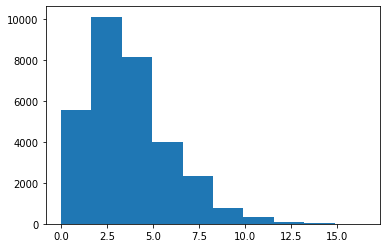

In [ ]:
plt.hist(wdf_cdf_32['wnd_speed']) # creates histogram from wind speed data
plt.show() # displays histogram

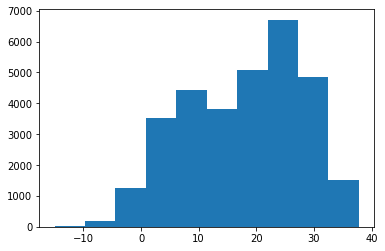

In [ ]:
plt.hist(wdf_cdf_32['tmp_meas']) # creates histogram from temperature data
plt.show() # displays histogram

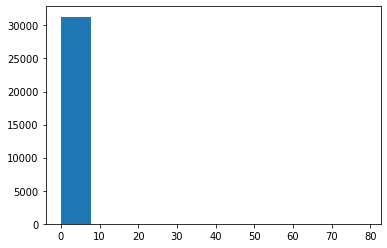

In [ ]:
plt.hist(wdf_cdf_32['precip']) # creates histogram from precipitation data
plt.show() # displays histogram

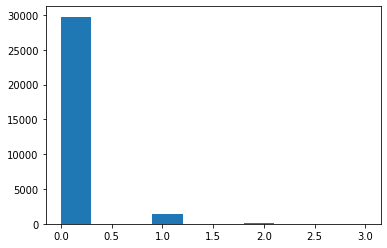

In [ ]:
plt.hist(wdf_cdf_32['precip_intensity']) # creates histogram from precipitation intensity data
plt.show() # displays histogram

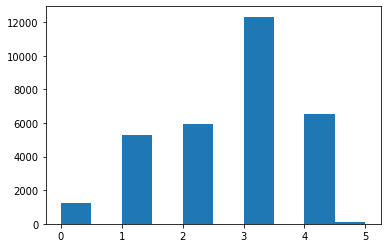

In [ ]:
plt.hist(wdf_cdf_32['cloudcover']) # creates histogram from cloud cover data
plt.show() # displays histogram

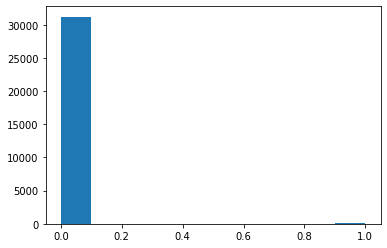

In [ ]:
plt.hist(wdf_cdf_32['tstorm']) # creates histogram from thunderstorm data
plt.show() # displays histogram

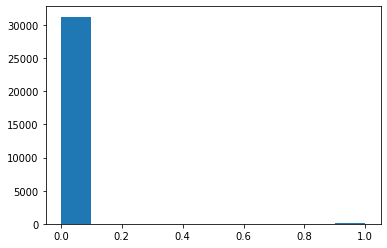

In [ ]:
plt.hist(wdf_cdf_32['winter']) # creates histogram from winter data
plt.show() # displays histogram

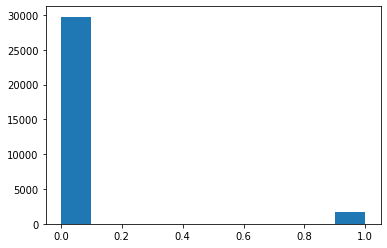

In [ ]:
plt.hist(wdf_cdf_32['mist']) # creates histogram for mist data
plt.show() # displays histogram

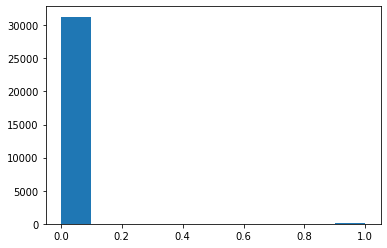

In [ ]:
plt.hist(wdf_cdf_32['fog']) # creates histogram for fog data
plt.show() # displays histogram

Based on the above histograms, the data for precipitation, precipitation intensity, thunderstorms, winter weather, mist, and fog all do not appear significant in terms of showing an affect for how weather affects citation volumes. The wind speed histogram shows more citations occurring at lower wind speeds and decreasing as the wind speed increases. The temperature histogram shows more citations occurring at higher temperatures, with a general upward trend until the highest bucket. The cloud cover histogram shows most citations occurring at moderate cloud cover, with it being a significant decrease on either end of it.